# Testing notebook with the updated features

In [6]:
import pandas as pd
pd.options.display.max_columns = None

df = pd.read_csv('../data/spanish_corpus_features_v6.csv')
df.head()

,text,headline,words_h,word_size_h,avg_syllables_word_h,unique_words_h,ttr_h,mltd_h,sents,words,avg_words_sent,avg_word_size,avg_syllables_word,unique_words,ttr,mltd,i_fernandez_huerta,i_szigriszt_pazos,ratio_uc_letters,entity_ratio,n_quotes,quotes_ratio,propn_ratio,noun_ratio,adp_ratio,det_ratio,punct_ratio,pron_ratio,verb_ratio,adv_ratio,sym_ratio,label
0,el pasado jueves 5 de noviembre la superintend...,nueva sanción a doña gallina por discriminar g...,9,5.89,2.22,100.00,100.00,0.00,9,351,39.00,4.41,1.79,42.45,54.42,76.65,59.66,56.01,2.13,3.13,11,3.13,6.27,17.95,14.53,13.68,9.69,3.99,6.27,2.56,0.00,0
1,la rae estudia incluir «machirulo» en el dicci...,la rae estudia incluir «machirulo» en el dicci...,10,4.50,1.80,100.00,100.00,0.00,18,437,24.28,4.23,1.73,30.66,44.39,63.54,78.27,74.78,2.94,5.49,23,5.26,7.55,13.50,10.98,13.73,17.16,1.83,8.70,3.66,0.00,1
2,el alto comisionado de naciones unidas para lo...,save the children y acnur alertan de riesgos q...,16,4.62,1.81,87.50,93.75,71.68,27,1276,47.26,4.47,1.82,24.92,35.50,76.24,49.43,45.91,3.42,4.39,54,4.23,6.82,15.44,16.85,11.91,10.66,3.61,10.97,2.66,0.47,1
3,el colegio de abogados ha entregado en la maña...,colegio de abogados de granada entrega distinc...,13,5.00,2.23,76.92,84.62,23.66,10,587,58.70,4.39,1.85,28.79,40.89,55.69,35.97,32.87,4.42,8.01,16,2.73,16.35,15.67,17.55,13.29,10.39,2.21,7.67,0.85,0.00,1
4,era todo un misterio el paradero de la familia...,espera de tres años a instalación de internet ...,14,4.43,2.00,64.29,78.57,18.29,15,424,28.27,4.16,1.73,41.27,53.54,83.89,74.20,70.57,1.76,3.54,11,2.59,4.01,16.04,13.68,14.15,12.97,4.48,10.14,4.72,0.24,0


In [7]:
df.columns

Index(['text', 'headline', 'words_h', 'word_size_h', 'avg_syllables_word_h',
       'unique_words_h', 'ttr_h', 'mltd_h', 'sents', 'words', 'avg_words_sent',
       'avg_word_size', 'avg_syllables_word', 'unique_words', 'ttr', 'mltd',
       'i_fernandez_huerta', 'i_szigriszt_pazos', 'ratio_uc_letters',
       'entity_ratio', 'n_quotes', 'quotes_ratio', 'propn_ratio', 'noun_ratio',
       'adp_ratio', 'det_ratio', 'punct_ratio', 'pron_ratio', 'verb_ratio',
       'adv_ratio', 'sym_ratio', 'label'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  3974 non-null   object 
 1   headline              3974 non-null   object 
 2   words_h               3974 non-null   int64  
 3   word_size_h           3974 non-null   float64
 4   avg_syllables_word_h  3974 non-null   float64
 5   unique_words_h        3974 non-null   float64
 6   ttr_h                 3974 non-null   float64
 7   mltd_h                3974 non-null   float64
 8   sents                 3974 non-null   int64  
 9   words                 3974 non-null   int64  
 10  avg_words_sent        3974 non-null   float64
 11  avg_word_size         3974 non-null   float64
 12  avg_syllables_word    3974 non-null   float64
 13  unique_words          3974 non-null   float64
 14  ttr                   3974 non-null   float64
 15  mltd                 

## Without TIFIDF transformation features

Testing AUC: 0.977077


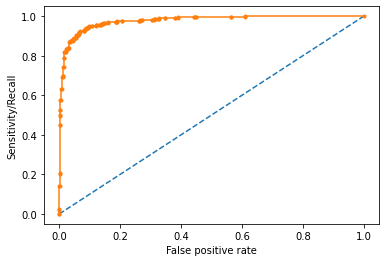

Logloss: 2.55
Accuracy: 92.62


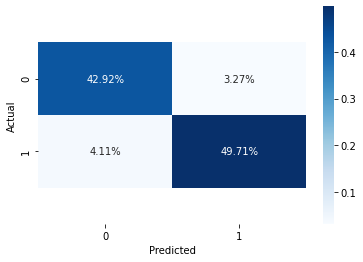

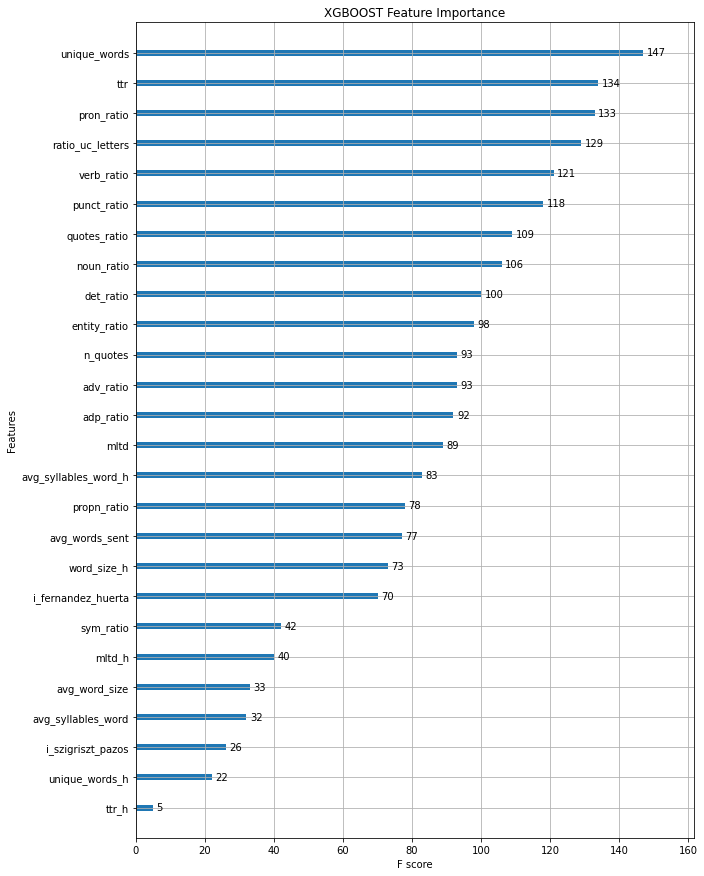

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, classification_report, log_loss

df = pd.read_csv('../data/spanish_corpus_features_v6.csv')
y = df['label']

########### Training and testing split ########### 

numerical_features = ['word_size_h', 'avg_syllables_word_h',
       'unique_words_h', 'ttr_h', 'mltd_h', 'avg_words_sent',
       'avg_word_size', 'avg_syllables_word', 'unique_words', 'ttr', 'mltd',
       'i_fernandez_huerta', 'i_szigriszt_pazos', 'ratio_uc_letters',
       'entity_ratio', 'n_quotes', 'quotes_ratio', 'propn_ratio', 'noun_ratio',
       'adp_ratio', 'det_ratio', 'punct_ratio', 'pron_ratio', 'verb_ratio',
       'adv_ratio', 'sym_ratio']

X = df[numerical_features]
tfvocab = df[numerical_features].columns.tolist()

# Calculating level of imbalance for modelling
imbalance_weight = y.value_counts(normalize = True)[0] / y.value_counts(normalize = True)[1]

# Training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)


########### XGB CLassifier ########### 

xgb_model = XGBClassifier(eval_metric = 'auc', objective = 'binary:logistic', nthread = 1, seed = 43, 
                    scale_pos_weight = imbalance_weight)

xgb_params = {'alpha': 0.4, 
              'colsample_bytree': 0.2, 
              'lambda': 0.5, 
              'learning_rate': 0.03, 
              'max_depth': 4, 
              'min_child_weight': 3, 
              'n_estimators': 200, 
              'subsample': 0.3}

xgb_model.fit(X_train, y_train)


########### Predictions and results ###########

# predictions
y_pred = xgb_model.predict(X_test)
probs = xgb_model.predict_proba(X_test)
probs = probs[:, 1]

# testing AUC
auc = roc_auc_score(y_test, probs)
print('Testing AUC: %f' % auc)

# roc curve calculation
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)

# plot the limits for no skill
plt.plot([0, 1], [0, 1], linestyle = '--')

# plot the roc curve

plt.plot(false_positive_rate, true_positive_rate, marker = '.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/Recall')
plt.show();

# accuracy score
print('Logloss: %.2f' % (log_loss(y_test, y_pred)))
print('Accuracy: %.2f' % (xgb_model.score(X_test, y_test) * 100))

# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred, labels = [0, 1])
ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Blues')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show();


########### Feature importance ###########

dict_features = dict(enumerate(tfvocab))

# feature importance with default names

f, ax = plt.subplots(figsize = [10, 15])
axsub = xgb.plot_importance(xgb_model, ax = ax)

# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(tfvocab))
list_yticklabels = [Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]

# feature importance
plt.title("XGBOOST Feature Importance")
axsub.set_yticklabels(list_yticklabels)
plt.show()

## With TFIDF features

/home/pipe11/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien', 'tod', 'tuv', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Testing AUC: 0.992955


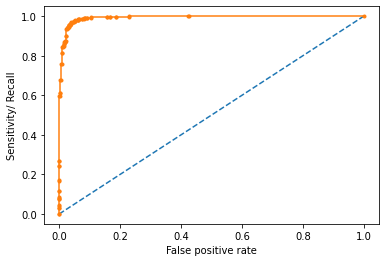

Logloss: 1.22
Accuracy: 96.48


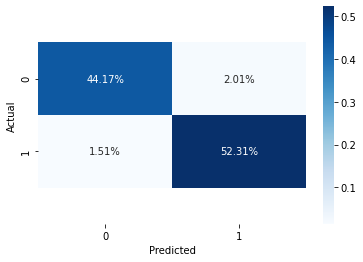

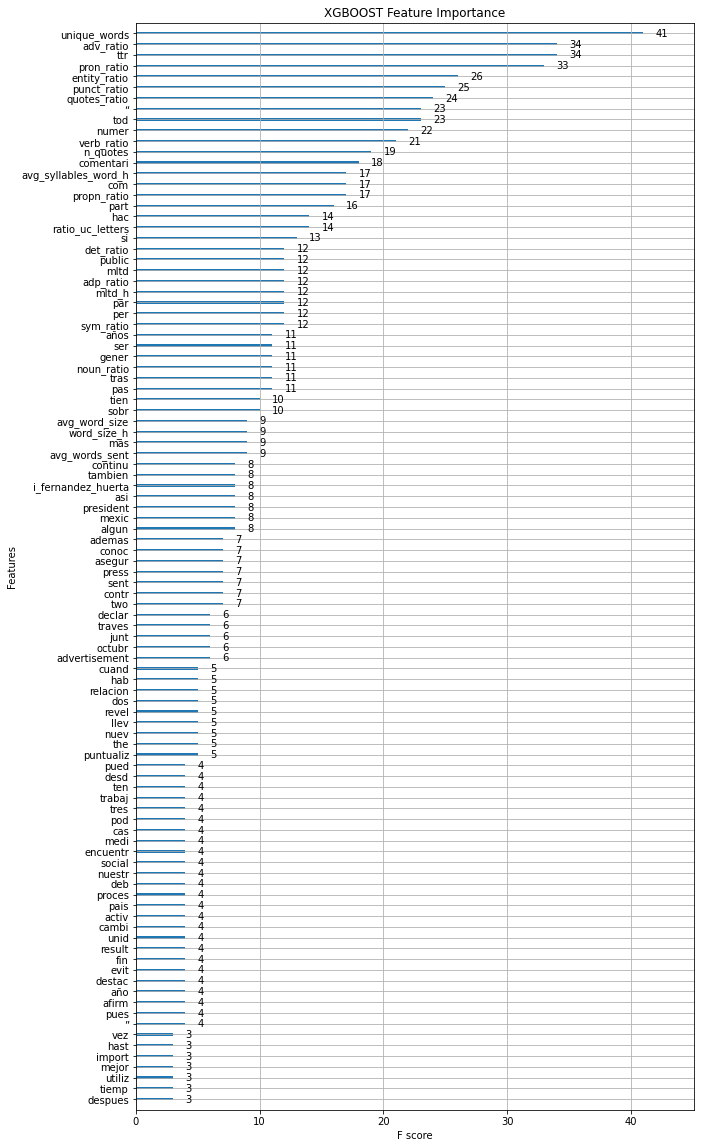

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords  
from nltk import word_tokenize  
from nltk.data import load  
from nltk.stem import SnowballStemmer  
from string import punctuation

from scipy import stats
from scipy.sparse import hstack, csr_matrix
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, classification_report, log_loss

df = pd.read_csv('../data/spanish_corpus_features_v6.csv')
y = df['label']

####### TFIDF Transformation to text ########

#Stopword list to use
spanish_stopwords = stopwords.words('spanish')

#Spanish stemmer:
stemmer = SnowballStemmer('spanish')

def stem_tokens(tokens, stemmer):  
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

#Punctuation to remove
non_words = list(punctuation)

#Adding spanish punctuation
non_words.extend(['¿', '¡'])  
non_words.extend(map(str,range(10)))

def tokenize(text):  
    #Remove punctuation
    text = ''.join([c for c in text if c not in non_words])
    #Tokenize
    tokens =  word_tokenize(text)

    #Stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems


tfidf_vectorizer = TfidfVectorizer(  
                analyzer = 'word',
                tokenizer = tokenize,
                lowercase = True,
                stop_words = spanish_stopwords)

text_vectorized = tfidf_vectorizer.fit_transform(df['text'])

tfvocab = tfidf_vectorizer.get_feature_names()


########### Combine features & train, test split ########### 

numerical_features = ['word_size_h', 'avg_syllables_word_h',
       'unique_words_h', 'ttr_h', 'mltd_h', 'avg_words_sent',
       'avg_word_size', 'avg_syllables_word', 'unique_words', 'ttr', 'mltd',
       'i_fernandez_huerta', 'i_szigriszt_pazos', 'ratio_uc_letters',
       'entity_ratio', 'n_quotes', 'quotes_ratio', 'propn_ratio', 'noun_ratio',
       'adp_ratio', 'det_ratio', 'punct_ratio', 'pron_ratio', 'verb_ratio',
       'adv_ratio', 'sym_ratio']

X = hstack([csr_matrix(df[numerical_features].values), text_vectorized[0:]])
tfvocab = df[numerical_features].columns.tolist() + tfvocab

# Calculating level of imbalance for modelling
imbalance_weight = y.value_counts(normalize = True)[0] / y.value_counts(normalize = True)[1]

# Training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)


########### XGB CLassifier ########### 

xgb_model = XGBClassifier(eval_metric = 'auc', objective = 'binary:logistic', nthread = 1, seed = 43, 
                    scale_pos_weight = imbalance_weight)

xgb_params = {'alpha': 0,
              'colsample_bytree': 0.5,
              'lambda': 1,
              'learning_rate': 0.02,
              'max_depth': 6,
              'min_child_weight': 1,
              'n_estimators': 1000,
              'subsample': 0.4}

xgb_model.fit(X_train, y_train)


########### Predictions and results ###########

# predictions
y_pred = xgb_model.predict(X_test)
probs = xgb_model.predict_proba(X_test)
probs = probs[:, 1]

# testing AUC
auc = roc_auc_score(y_test, probs)
print('Testing AUC: %f' % auc)

# roc curve calculation
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)

# plot the limits for no skill
plt.plot([0, 1], [0, 1], linestyle = '--')

# plot the roc curve

plt.plot(false_positive_rate, true_positive_rate, marker = '.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
plt.show();

# accuracy score
print('Logloss: %.2f' % (log_loss(y_test, y_pred)))
print('Accuracy: %.2f' % (xgb_model.score(X_test, y_test) * 100))

# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred, labels = [0, 1])
ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Blues')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show();


########### Feature importance ###########

dict_features = dict(enumerate(tfvocab))

# feature importance with default names

f, ax = plt.subplots(figsize = [10, 20])
axsub = xgb.plot_importance(xgb_model, max_num_features = 100, ax = ax)

# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(tfvocab))
lst_yticklabels = [Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [dict_features[int(i)] for i in lst_yticklabels]

# feature importance
plt.title("XGBOOST Feature Importance")
axsub.set_yticklabels(lst_yticklabels)
plt.show()